In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset for mobility
mobility = pd.read_csv("../data/usitc/border_crossing_entry_data_trade.csv")

In [3]:
mobility.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,imports,exports
0,Alexandria Bay,NY,708,US-Canada Border,12/1/2019 0:00,Bus Passengers,740,NaN,NaN
1,Baudette,MN,3424,US-Canada Border,12/1/2019 0:00,Bus Passengers,83,NaN,NaN
2,Blaine,WA,3004,US-Canada Border,12/1/2019 0:00,Bus Passengers,17029,NaN,NaN
3,Brownsville,TX,2301,US-Mexico Border,12/1/2019 0:00,Bus Passengers,4668,3.580000e+11,1.960000e+11
4,Buffalo-Niagara Falls,NY,901,US-Canada Border,12/1/2019 0:00,Bus Passengers,9910,NaN,NaN


In [4]:
# Include only mobility on the US-MX border
borderMX = mobility[(mobility['Border']=="US-Mexico Border")]

In [5]:
borderMX.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,imports,exports
3,Brownsville,TX,2301,US-Mexico Border,12/1/2019 0:00,Bus Passengers,4668,3.580000e+11,1.960000e+11
6,Calexico East,CA,2507,US-Mexico Border,12/1/2019 0:00,Bus Passengers,4080,3.580000e+11,1.960000e+11
8,Columbus,NM,2406,US-Mexico Border,12/1/2019 0:00,Bus Passengers,1452,3.580000e+11,1.960000e+11
11,Douglas,AZ,2601,US-Mexico Border,12/1/2019 0:00,Bus Passengers,107,3.580000e+11,1.960000e+11
13,Eagle Pass,TX,2303,US-Mexico Border,12/1/2019 0:00,Bus Passengers,8525,3.580000e+11,1.960000e+11


In [77]:
borderMX["Measure"].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

In [6]:
# Extract year and consolidate year
import datetime
borderMX['year']= pd.DatetimeIndex(borderMX['Date']).year

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
## Encoding the categorial variable

In [102]:
df = borderMX[["year","State","Port Code","Value"]].copy()

In [103]:
X1 = df.iloc[:,[0,1,2,3]].values
print(X1)

[[2019 'TX' 2301 4668]
 [2019 'CA' 2507 4080]
 [2019 'NM' 2406 1452]
 ...
 [1996 'NM' 2408 4719]
 [1996 'TX' 2403 645]
 [1996 'CA' 2505 3228]]


In [104]:
# Encoding categorical data
# Encoding the independent variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [105]:
labelencoder = LabelEncoder()
X1[:, 1] = labelencoder.fit_transform(X1[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X1 = onehotencoder.fit_transform(X1).toarray()

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [106]:
# California is Index 1, KEEP
print(X1.shape)

(82288, 7)


In [124]:
# Create exports matrix for trade data
ex = borderMX.iloc[:,[8]].values

In [108]:
print(ex)

[[1.96000000e+11]
 [1.96000000e+11]
 [1.96000000e+11]
 ...
 [5.46858652e+10]
 [5.46858652e+10]
 [5.46858652e+10]]


In [109]:
X1 = np.append(arr=X1, values= ex.astype(float),axis=1)

In [110]:
print(X1)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.30100000e+03
  4.66800000e+03 1.96000000e+11]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.50700000e+03
  4.08000000e+03 1.96000000e+11]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.40600000e+03
  1.45200000e+03 1.96000000e+11]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.40800000e+03
  4.71900000e+03 5.46858652e+10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.40300000e+03
  6.45000000e+02 5.46858652e+10]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.50500000e+03
  3.22800000e+03 5.46858652e+10]]


In [111]:
## Prepping for Naive Bayes

In [112]:
# Re-establishing the X matrix:
X = X1[:,[4,7]]
print(X)

[[2.01900000e+03 1.96000000e+11]
 [2.01900000e+03 1.96000000e+11]
 [2.01900000e+03 1.96000000e+11]
 ...
 [1.99600000e+03 5.46858652e+10]
 [1.99600000e+03 5.46858652e+10]
 [1.99600000e+03 5.46858652e+10]]


In [113]:
y = X1[:,1]

In [114]:
print(y)

[0. 1. 0. ... 0. 0. 1.]


In [115]:
y.shape

(82288,)

In [116]:
## Starting Naive Bayes

In [117]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [118]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [121]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12516     0]
 [ 3942     0]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


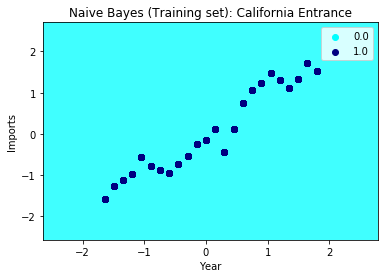

In [122]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Naive Bayes (Training set): California Entrance')
plt.xlabel('Year')
plt.ylabel('Imports')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


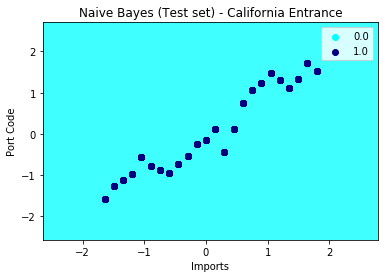

In [123]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Naive Bayes (Test set) - California Entrance')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()